<a href="https://colab.research.google.com/github/lipeng2021/-python1/blob/main/linear_regulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
%matplotlib inline
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

生成数据集

In [32]:
num_inputs = 2
num_examples =1000
true_w = [2,-3.4]
true_b = 4.2
features = torch.from_numpy(np.random.normal(0,1,(num_examples,num_inputs)))
labels = true_w[0]*features[:,0]+true_w[1]*features[:,1]+true_b
labels += torch.from_numpy(np.random.normal(0,0.01,size=labels.size()))

显示数据散点图

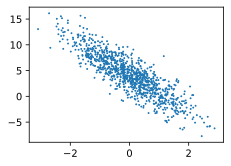

In [33]:
def use_svg_display():
  display.set_matplotlib_formats('svg')
def set_figsize(figsize=(3.5,2.5)):
  use_svg_display()
  plt.rcParams['figure.figsize']=figsize

set_figsize()
plt.scatter(features[:,1].numpy(),labels.numpy(),1)

读取数据

In [34]:
def data_iter(batch_size,features,labels):
  num_examples1 = len(features)
  indices = list(range(num_examples))
  random.shuffle(indices)
  for i in range(0,num_examples,batch_size):
    j = torch.LongTensor(indices[i:min(i+batch_size,num_examples)])
    yield features.index_select(0,j),labels.index_select(0,j)


In [35]:
batch_size=10;
for X,y in data_iter(batch_size,features,labels):
  print(X,y)
  break

tensor([[-4.1471e-01, -8.3637e-01],
        [ 1.6098e+00,  1.5582e+00],
        [-2.8892e-01,  8.8271e-01],
        [-5.7816e-04, -8.7770e-01],
        [ 1.2794e+00, -1.3391e+00],
        [ 6.1484e-01,  1.2601e-01],
        [-4.9857e-01, -1.9159e+00],
        [-1.8467e-01, -1.0181e+00],
        [ 5.1442e-01,  9.2296e-01],
        [-4.0450e-01,  1.2665e-01]], dtype=torch.float64) tensor([ 6.2177,  2.1351,  0.6368,  7.1750, 11.3270,  4.9888,  9.7138,  7.2889,
         2.0831,  2.9679], dtype=torch.float64)


初始化模型参数

In [36]:
w = torch.tensor(np.random.normal(0,0.01,(num_inputs,1)),dtype=torch.float64)
b = torch.zeros(1,dtype=torch.float64)
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([0.], dtype=torch.float64, requires_grad=True)

定义模型

In [37]:
def linreg(X,w,b):
 return torch.mm(X,w)+b

定义损失函数

In [38]:
def squares_loss(y_hat,y):
  return (y_hat-y.view(y_hat.size()))**2/2

定义优化算法

In [39]:
def sgd(params,lr,batchsize):
  for param in params:
    param.data -= lr* param.grad/batch_size

训练模型

In [40]:
lr=0.03
num_epochs=3
net= linreg
loss=squares_loss
for epoch in range(num_epochs):
  for X,y in data_iter(batch_size,features,labels):
    l = loss(net(X,w,b),y).sum()
    l.backward()
    sgd([w,b],lr,batch_size)
    w.grad.data.zero_()
    b.grad.data.zero_()
  train_1 = loss(net(features,w,b),labels)
  print('epoch %d,loss %f' % (epoch+1,train_1.mean().item()))

epoch 1,loss 0.040508
epoch 2,loss 0.000162
epoch 3,loss 0.000051
